In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
noc = "noc_regions.csv"
athlete = "athlete_events.csv"

In [3]:
#  define data 
athlete_events = pd.read_csv(athlete)
noc_regions = pd.read_csv(noc)

In [4]:
# merge data 
df = pd.merge(athlete_events, noc_regions, on='NOC', how='left')

In [5]:
# Asian countries
asia = ["AFG","ARM","AZE","BRN","BAN","BHU","BRU","CAM","CHN","HKG","GEO",
        "IND","INA","IRI","IRQ","ISR","JPN","JOR","KAZ","KUW","KGZ","LAO",
        "LIB","MAL","MAS","NBO","MDV","MRI","MGL","MYA","NEP","PRK","OMA",
        "PAK","PLE","PHI","QAT","KSA","SIN","KOR","SRI","SYR","UAR","TPE",
        "TJK","THA","TUR","TKM","UAE","UZB","VIE","VNM","YAR","YEM","YMD"]

In [6]:
# data of Asia 
df_asia = df.loc[df.NOC.isin(asia)].copy()

# Asia

In [8]:
# info of data
df_asia.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
147,54,Mohamed Jamshid Abadi,M,NaN,NaN,NaN,Iran,IRI,1948 Summer,1948,Summer,London,Boxing,Boxing Men's Heavyweight,NaN,Iran,NaN
161,65,Patimat Abakarova,F,21.0,165.0,49.0,Azerbaijan,AZE,2016 Summer,2016,Summer,Rio de Janeiro,Taekwondo,Taekwondo Women's Flyweight,Bronze,Azerbaijan,NaN
180,78,Salim Abanoz,M,26.0,NaN,NaN,Turkey,TUR,1996 Summer,1996,Summer,Atlanta,Judo,Judo Men's Lightweight,NaN,Turkey,NaN


In [9]:
df_asia.shape

(34598, 17)

In [10]:
df_asia.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal', 'region', 'notes'],
      dtype='object')

In [11]:
df_asia.describe()

,ID,Age,Height,Weight,Year
count,34598.000000,33380.000000,29908.000000,29890.000000,34598.000000
mean,73669.193046,24.084242,171.021232,66.165289,1990.219203
std,39361.985077,5.129478,10.084522,13.884692,20.837150
min,1.000000,11.000000,132.000000,25.000000,1900.000000
25%,46922.250000,21.000000,164.000000,57.000000,1976.000000
50%,69972.500000,23.000000,170.000000,65.000000,1996.000000
75%,109703.750000,27.000000,178.000000,73.000000,2008.000000
max,135547.000000,71.000000,226.000000,163.000000,2016.000000


In [12]:
df_asia.dtypes

ID          int64
Name       object
Sex        object
Age       float64
Height    float64
Weight    float64
Team       object
NOC        object
Games      object
Year        int64
Season     object
City       object
Sport      object
Event      object
Medal      object
region     object
notes      object
dtype: object

In [13]:
# clean data
df_asia.duplicated().sum()

21

In [14]:
df_asia.drop_duplicates(inplace=True)
df_asia.duplicated().sum()

0

In [15]:
df_asia.isna().sum()

ID            0
Name          0
Sex           0
Age        1215
Height     4669
Weight     4687
Team          0
NOC           0
Games         0
Year          0
Season        0
City          0
Sport         0
Event         0
Medal     31055
region        0
notes     33751
dtype: int64

In [16]:
df_asia

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
147,54,Mohamed Jamshid Abadi,M,NaN,NaN,NaN,Iran,IRI,1948 Summer,1948,Summer,London,Boxing,Boxing Men's Heavyweight,NaN,Iran,NaN
161,65,Patimat Abakarova,F,21.0,165.0,49.0,Azerbaijan,AZE,2016 Summer,2016,Summer,Rio de Janeiro,Taekwondo,Taekwondo Women's Flyweight,Bronze,Azerbaijan,NaN
180,78,Salim Abanoz,M,26.0,NaN,NaN,Turkey,TUR,1996 Summer,1996,Summer,Atlanta,Judo,Judo Men's Lightweight,NaN,Turkey,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270981,135503,Zurab Zviadauri,M,23.0,182.0,90.0,Georgia,GEO,2004 Summer,2004,Summer,Athina,Judo,Judo Men's Middleweight,Gold,Georgia,NaN
271052,135547,Viktoriya Viktorovna Zyabkina,F,19.0,174.0,62.0,Kazakhstan,KAZ,2012 Summer,2012,Summer,London,Athletics,Athletics Women's 200 metres,NaN,Kazakhstan,NaN
271053,135547,Viktoriya Viktorovna Zyabkina,F,23.0,174.0,62.0,Kazakhstan,KAZ,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Women's 100 metres,NaN,Kazakhstan,NaN
271054,135547,Viktoriya Viktorovna Zyabkina,F,23.0,174.0,62.0,Kazakhstan,KAZ,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Women's 200 metres,NaN,Kazakhstan,NaN


In [17]:
# age is important in sport, 1215 athlete has no age, 31055 didn't get medal
# rows where age and medal is not null
sum(df_asia[df_asia['Age'].isna()] ['Medal'].isna())

1172

In [18]:
df_asia.Sex.nunique()

2

In [19]:
sum(df_asia.Sex=='M')

23620

(-1.1112206810747738,
 1.1988169665563972,
 -1.1141938121715196,
 1.1576724985297457)

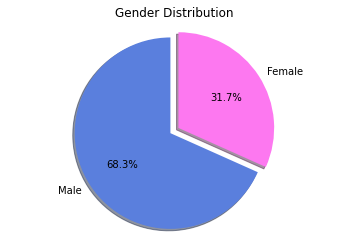

In [20]:
Sex=['Male','Female']
#cnt=[11966-2644,2644]
cnt = [sum(df_asia.Sex=='M'), sum(df_asia.Sex=='F')]
explode=(0,0.1)
plt.pie(x=cnt, labels=Sex, explode=explode,autopct='%1.1f%%', startangle=90, shadow=True, colors=['#5A7FDD','#FD78F0'])
plt.title("Gender Distribution")
plt.axis('equal')

In [21]:
# medals data 
df_medals = df_asia[~(df_asia.Medal.isna())].copy()

In [22]:
df_medals.shape
# 3522 athlete got medals

(3522, 17)

In [23]:
df_medals.describe()

,ID,Age,Height,Weight,Year
count,3522.000000,3479.000000,3228.000000,3217.000000,3522.000000
mean,78357.310903,24.130785,170.699814,66.934204,1992.917660
std,37931.594728,4.129707,9.693859,14.503670,21.036869
min,65.000000,13.000000,136.000000,28.000000,1900.000000
25%,52336.000000,21.000000,164.000000,58.000000,1984.000000
50%,71928.000000,24.000000,170.000000,65.000000,2000.000000
75%,113258.000000,27.000000,177.000000,74.000000,2008.000000
max,135503.000000,48.000000,205.000000,160.000000,2016.000000


(-1.1047708721970209,
 1.1023483235248026,
 -1.1019635159457213,
 1.100093534924937)

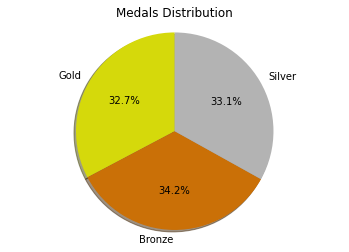

In [24]:
# medal distribution
medal=['Gold','Bronze','Silver']
cnt=[sum(df_medals.Medal == 'Gold'), sum(df_medals.Medal == 'Bronze'), sum(df_medals.Medal == 'Silver')]
plt.pie(x = cnt, labels = medal, autopct='%1.1f%%', startangle=90, shadow=True, colors=['#D5D90B','#CA7007','0.7'])
plt.title("Medals Distribution")
plt.axis('equal')

In [25]:
df_medals['region'].value_counts().sort_values(ascending=False)

China                   993
Japan                   913
South Korea             638
India                   197
Pakistan                121
Turkey                   95
Kazakhstan               77
Iran                     68
North Korea              67
Taiwan                   49
Azerbaijan               44
Indonesia                41
Uzbekistan               34
Georgia                  32
Thailand                 30
Mongolia                 26
Armenia                  16
Malaysia                 16
Philippines              10
Israel                    9
Saudi Arabia              6
Qatar                     5
Syria                     5
Vietnam                   4
Tajikistan                4
Lebanon                   4
Bahrain                   3
Kyrgyzstan                3
Sri Lanka                 2
Kuwait                    2
Afghanistan               2
United Arab Emirates      2
Nepal                     1
Jordan                    1
Mauritius                 1
Iraq                

In [26]:
top_medals = df_medals['region'].value_counts(ascending=False).head(10)
top_medals

China          993
Japan          913
South Korea    638
India          197
Pakistan       121
Turkey          95
Kazakhstan      77
Iran            68
North Korea     67
Taiwan          49
Name: region, dtype: int64

Text(0.5, 0, 'Country')

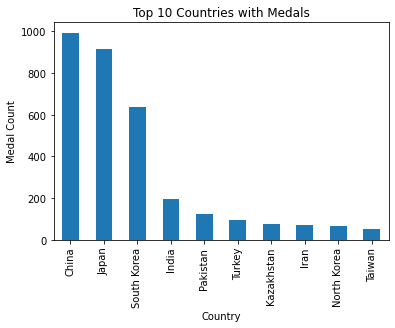

In [27]:
# top 10 countries
top_medals = df_medals['region'].value_counts(ascending=False).head(10)
ax = top_medals.plot(kind='bar', title='Top 10 Countries with Medals')
ax.set_ylabel('Medal Count')
ax.set_xlabel('Country')

Text(0.5, 1.0, 'Medals per Year')

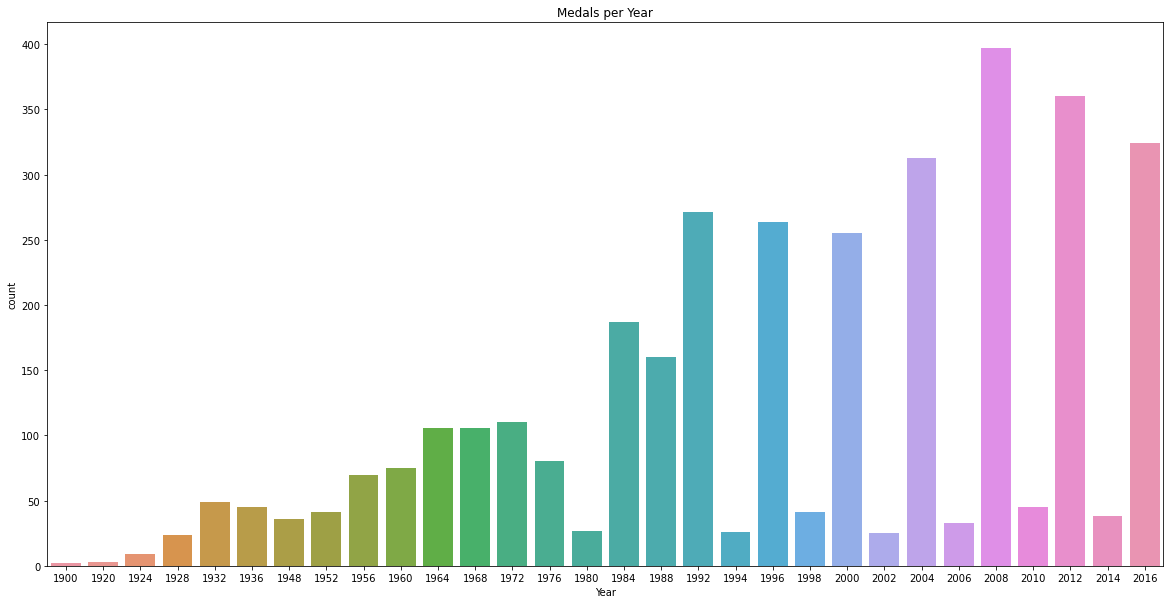

In [28]:
# medals per year
plt.figure(figsize=(20, 10))
sns.countplot(x='Year', data=df_medals)
plt.style.use('seaborn')
plt.title('Medals per Year')

Text(0.5, 1.0, 'Medals per Age')

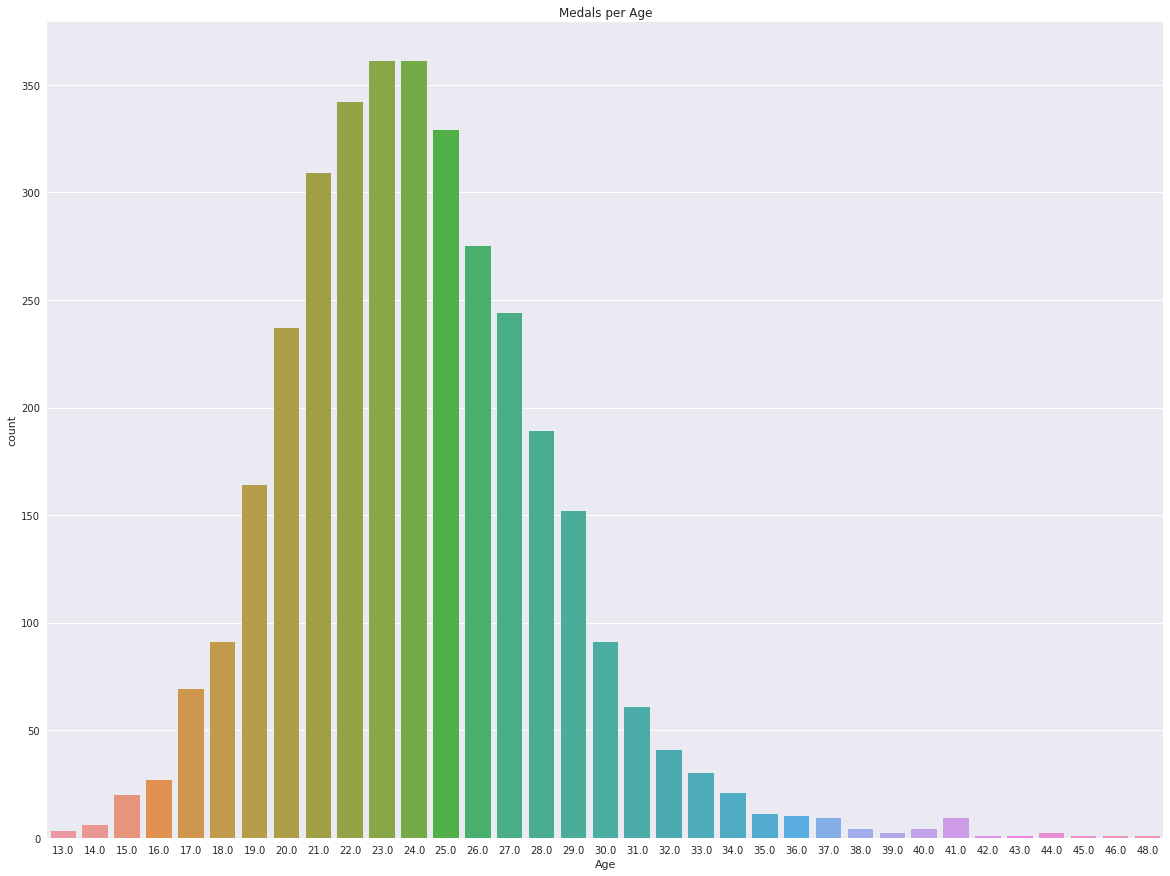

In [29]:
# medals per age
plt.figure(figsize=(20, 15))
sns.countplot(x='Age', data=df_medals)
plt.style.use('seaborn')
plt.title('Medals per Age')

(-1.1186467807897833,
 1.218002934727327,
 -1.1145893608409556,
 1.1335829654049197)

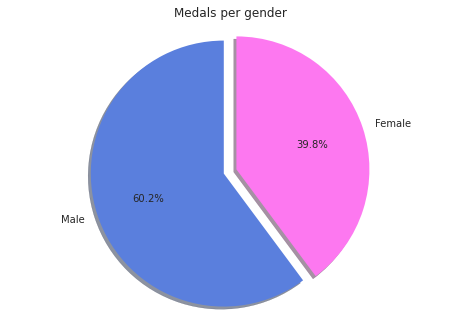

In [30]:
# medal per gender
Sex=['Male','Female']
cnt=[sum(df_medals.Sex=='M'), sum(df_medals.Sex=='F')]
explode=(0,0.1)
plt.pie(x=cnt, labels=Sex, explode=explode,autopct='%1.1f%%', startangle=90, shadow=True, colors=['#5A7FDD','#FD78F0'])
plt.title("Medals per gender")
plt.axis('equal')

# India

In [32]:
df[df.NOC=='IND']

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
505,281,S. Abdul Hamid,M,NaN,NaN,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Athletics,Athletics Men's 110 metres Hurdles,NaN,India,NaN
506,281,S. Abdul Hamid,M,NaN,NaN,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Athletics,Athletics Men's 400 metres Hurdles,NaN,India,NaN
895,512,Shiny Kurisingal Abraham-Wilson,F,19.0,167.0,53.0,India,IND,1984 Summer,1984,Summer,Los Angeles,Athletics,Athletics Women's 800 metres,NaN,India,NaN
896,512,Shiny Kurisingal Abraham-Wilson,F,19.0,167.0,53.0,India,IND,1984 Summer,1984,Summer,Los Angeles,Athletics,Athletics Women's 4 x 400 metres Relay,NaN,India,NaN
897,512,Shiny Kurisingal Abraham-Wilson,F,23.0,167.0,53.0,India,IND,1988 Summer,1988,Summer,Seoul,Athletics,Athletics Women's 800 metres,NaN,India,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264139,132177,Mohammad Anas Yahiya,M,21.0,177.0,69.0,India,IND,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Men's 4 x 400 metres Relay,NaN,India,NaN
265876,133029,"Thyadathuvilla Chandrapillai ""T. C."" Yohannan",M,29.0,174.0,62.0,India,IND,1976 Summer,1976,Summer,Montreal,Athletics,Athletics Men's Long Jump,NaN,India,NaN
266934,133554,Sayed Muhammad Yusuf,M,NaN,NaN,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Hockey,Hockey Men's Hockey,Gold,India,NaN
270912,135480,Geeta Zutshi,F,23.0,167.0,51.0,India,IND,1980 Summer,1980,Summer,Moskva,Athletics,Athletics Women's 800 metres,NaN,India,NaN


In [33]:
df_india = df[df.NOC=='IND'].copy()

In [34]:
df_india.isna().sum()

ID           0
Name         0
Sex          0
Age        150
Height     517
Weight     539
Team         0
NOC          0
Games        0
Year         0
Season       0
City         0
Sport        0
Event        0
Medal     1211
region       0
notes     1408
dtype: int64

In [35]:
# drop columns which are not useful 
df_india.drop(columns = ['notes','Height','Weight','region'], inplace=True)

In [36]:
df_india_medals = df_india[df_india.Medal.notna()]
df_india_medals

,ID,Name,Sex,Age,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
4732,2699,Shaukat Ali,M,30.0,India,IND,1928 Summer,1928,Summer,Amsterdam,Hockey,Hockey Men's Hockey,Gold
4736,2703,Syed Mushtaq Ali,M,22.0,India,IND,1964 Summer,1964,Summer,Tokyo,Hockey,Hockey Men's Hockey,Gold
5032,2864,Richard James Allen,M,25.0,India,IND,1928 Summer,1928,Summer,Amsterdam,Hockey,Hockey Men's Hockey,Gold
5033,2864,Richard James Allen,M,30.0,India,IND,1932 Summer,1932,Summer,Los Angeles,Hockey,Hockey Men's Hockey,Gold
5034,2864,Richard James Allen,M,34.0,India,IND,1936 Summer,1936,Summer,Berlin,Hockey,Hockey Men's Hockey,Gold
...,...,...,...,...,...,...,...,...,...,...,...,...,...
233749,117232,Dung Dung Sylvanus,M,31.0,India,IND,1980 Summer,1980,Summer,Moskva,Hockey,Hockey Men's Hockey,Gold
236445,118553,Carlyle Carrol Tapsell,M,23.0,India,IND,1932 Summer,1932,Summer,Los Angeles,Hockey,Hockey Men's Hockey,Gold
236446,118553,Carlyle Carrol Tapsell,M,27.0,India,IND,1936 Summer,1936,Summer,Berlin,Hockey,Hockey Men's Hockey,Gold
250689,125560,"Max ""Maxie"" Vaz",M,NaN,India,IND,1948 Summer,1948,Summer,London,Hockey,Hockey Men's Hockey,Gold


In [37]:
df_india.duplicated().sum()

0

Text(0.5, 1.0, 'Medals per Age')

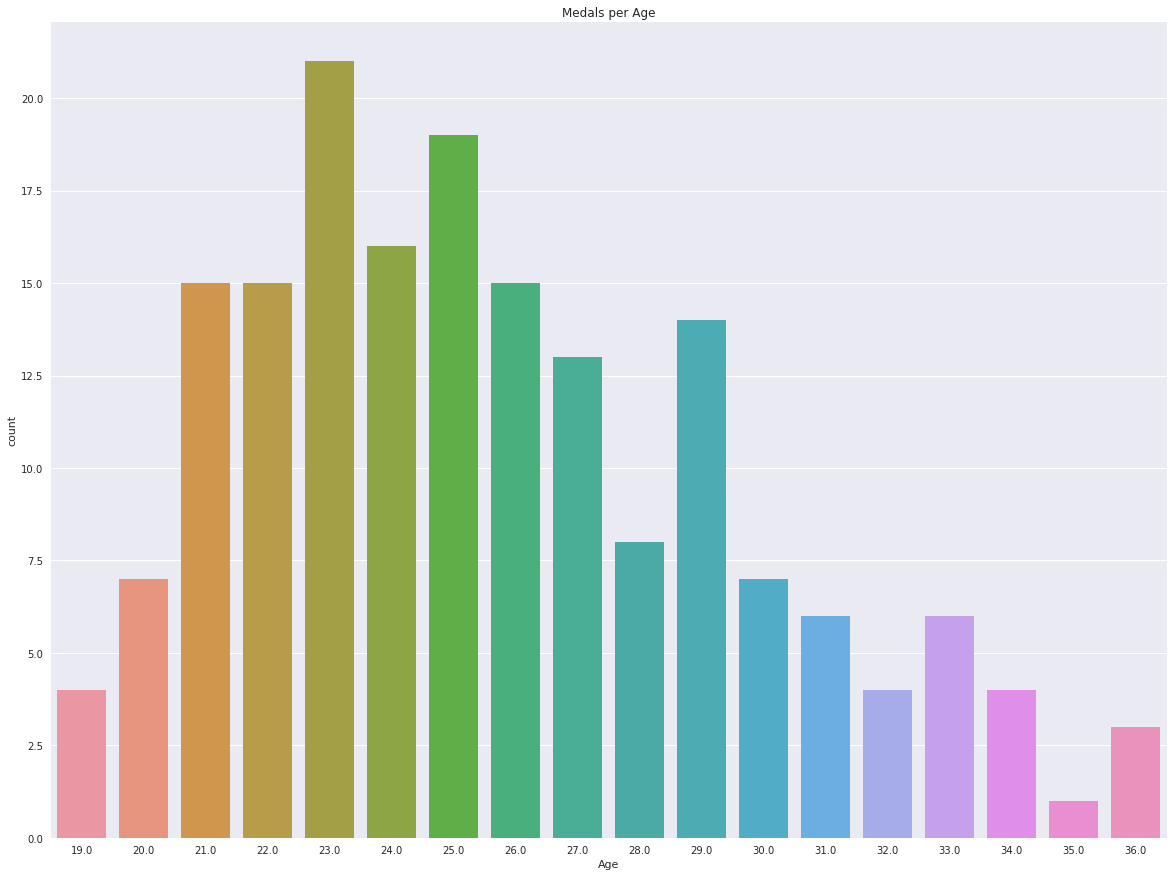

In [38]:
# medals per age
plt.figure(figsize=(20, 15))
sns.countplot(x='Age', data=df_india_medals)
plt.style.use('seaborn')
plt.title('Medals per Age')

(-1.1050165198944648,
 1.1052339591584062,
 -1.1104703289540985,
 1.19047584135804)

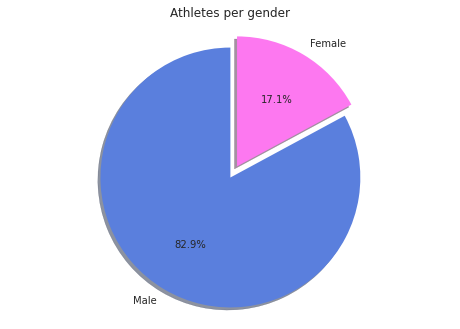

In [39]:
# Participants per gender in India
Sex=['Male','Female']
cnt=[sum(df_india.Sex=='M'), sum(df_india.Sex=='F')]
explode=(0,0.1)
plt.pie(x=cnt, labels=Sex, explode=explode,autopct='%1.1f%%', startangle=90, shadow=True, colors=['#5A7FDD','#FD78F0'])
plt.title("Athletes per gender")
plt.axis('equal')

(-1.1074567666979032,
 1.1088844477467228,
 -1.1083221334450868,
 1.108841350947433)

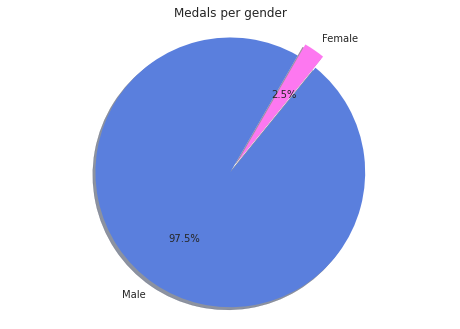

In [40]:
# medal per gender in India
Sex=['Male','Female']
cnt=[sum(df_india_medals.Sex=='M'), sum(df_india_medals.Sex=='F')]
explode=(0,0.1)
plt.pie(x=cnt, labels=Sex, explode=explode, autopct='%1.1f%%', startangle=60, shadow=True, colors=['#5A7FDD','#FD78F0'])
plt.title("Medals per gender")
plt.axis('equal')